# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

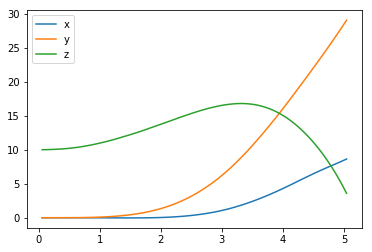

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

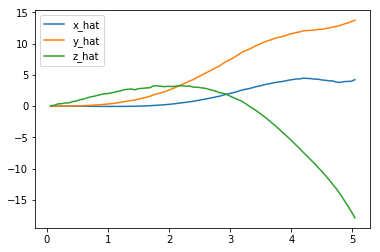

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

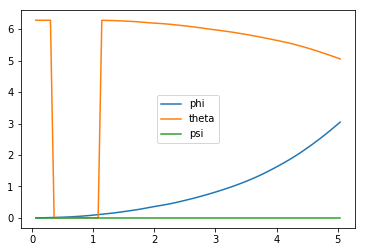

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

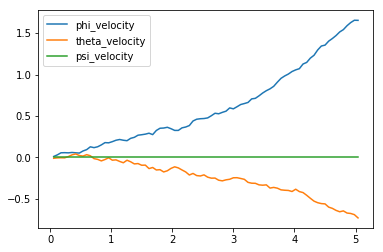

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

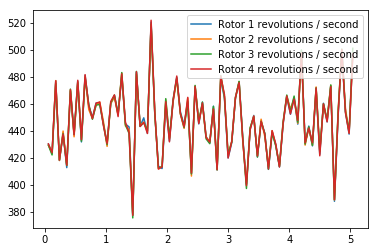

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  8.63044231  29.03764845   3.59698663   3.04504691   5.05312692   0.        ]
[  4.23451395  13.74207113 -17.87598269]
[ 1.65273167 -0.72834617  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 200
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =  200, score =  -0.090 (best =  -0.084), noise_scale = 3.25

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
## TODO: Train your agent here.
from agents.agent import DDPG
from task import Task
import tensorflow as tf

# plant seeds for reproducibility
np.random.seed(215)
tf.set_random_seed(1128)

# coordinates that the quadcopter is supposed to hover at
current_coordinates = [100., 100., 100.]

# Task's parameters (Hovering)
init_pose = np.array(current_coordinates + [0., 0., 0.])
init_velocities = np.array([0., 0., 0.])
init_angle_velocities = np.array([0., 0., 0.])
runtime = 10 # the amount of time that the agent is required to maintain its positions
target_pos = np.array(current_coordinates + [0., 0., 0.])

# instantiate Task and DDPG agent objects
task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos=target_pos)
agent = DDPG(task)

# a list to store the total rewards for all (every) episodes
recorded_total_rewards = []

# a list to store the positions during runtime for all (every) episodes
recorded_coordinates = []

# number of training episodes
num_episodes = 350

# train the agent to hover
for episode in range(1, num_episodes + 1):
    state = agent.reset_episode() # start a new episode
    total_reward = 0 # reset total reward for each episode
    current_positions = [] # a list to store the postions at each timestep within an episode
    
    # perform hovering during runtime
    for i in range(runtime):
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        total_reward += reward
        current_positions.append(list(task.sim.pose[:3]))
        
        # record at the final timestep in each episode
        if i == runtime - 1:
            print("\rEpisode = {:4d}, total reward = {:7.3f}, score = {:7.3f} (best = {:7.3f})".format(
                episode, total_reward, agent.score, agent.best_score), end="")
            recorded_total_rewards.append(total_reward)
            recorded_coordinates.append(current_positions)
        sys.stdout.flush()

Using TensorFlow backend.


Episode =  350, total reward =  -0.270, score =  -0.027 (best =  -0.000)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

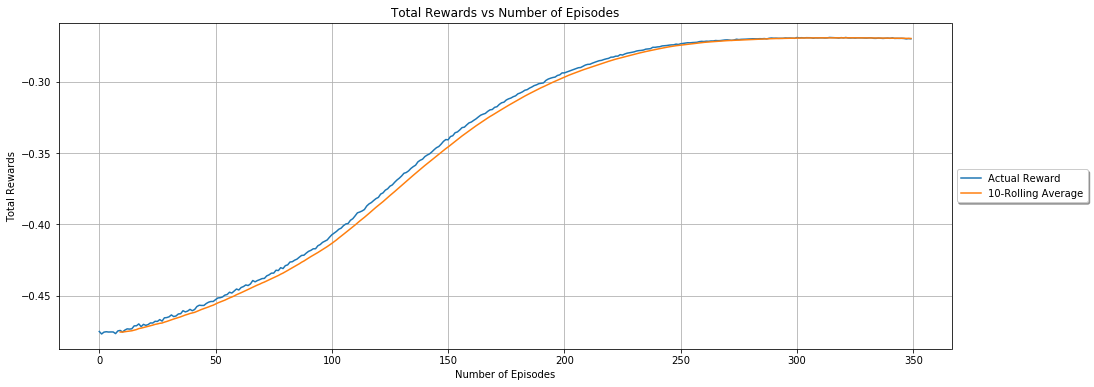

In [11]:
## TODO: Plot the rewards.
def episodes_rewards(rewards, window=None):
    """Plot the recorded total rewards vs episodes for the trained agent."""
    # plot the actual rewards
    episodes, rewards = np.arange(len(rewards)), np.array(rewards)
    fig, ax = plt.subplots(figsize=(16, 6))
    ax.xaxis.grid(True, which='both')
    ax.yaxis.grid(True, which='both')
    plt.plot(episodes, rewards)
    plt.xlabel('Number of Episodes')
    plt.ylabel('Total Rewards')
    plt.title('Total Rewards vs Number of Episodes')
    
    def rolling_average(data, window):
        """subroutine if window is not None."""
        weights = np.ones(window) / window
        return np.convolve(data, weights, mode='valid')
    
    # plot the averaged rewards
    if window is not None:
        averaged_total_rewards = rolling_average(rewards, window)
        plt.plot(episodes[window - 1:], averaged_total_rewards)
        plt.legend(['Actual Reward', '{}-Rolling Average'.format(window)], 
                   loc='center left', 
                   bbox_to_anchor=(1, 0.5), 
                   fancybox=True, 
                   shadow=True)
    
    plt.show()

# plot the recorded total rewards for the hovering agent
episodes_rewards(recorded_total_rewards, window=10)

## Agent's Performance Comparison

Here, we compare the agent's performance numerically and visually.

In [12]:
print("Positions during runtime in the last episode")
recorded_coordinates[-1]

Positions during runtime in the last episode


[[100.00000003417487, 100.00057784119343, 100.01031520440047],
 [100.00000067657734, 100.01225409424113, 100.03876889500442],
 [100.00000321196065, 100.06102153566329, 100.06720443160798],
 [100.00000898774907, 100.1561086539359, 100.0501943894822],
 [100.0000193082291, 100.25647214531114, 99.953722370775097],
 [100.0000355079568, 100.31641126887217, 99.809638051654147],
 [100.00005923559475, 100.36201200375308, 99.667948767465134],
 [100.00009308743795, 100.44556234144777, 99.506026534017337],
 [100.00013959360062, 100.54473810646508, 99.272078966344964],
 [100.00020151336332, 100.60735542750731, 98.986654517248681]]

In [13]:
print("Positions during runtime in the first episode")
recorded_coordinates[0]

Positions during runtime in the first episode


[[100.00000008700273, 100.00015213754361, 100.02343316456505],
 [100.0000015778393, 100.00337148324716, 100.09325438265942],
 [100.00000709629613, 100.01894076122022, 100.20767740162735],
 [100.00001934619927, 100.06234279339888, 100.36155445490546],
 [100.00004097597461, 100.15296458018531, 100.5429982216105],
 [100.00007459354475, 100.30929397482844, 100.73029912803467],
 [100.00012284359748, 100.54193660264667, 100.89160331448397],
 [100.00018850031879, 100.84608621457625, 100.9892836021357],
 [100.00027451491188, 101.19693627267141, 100.98972695074684],
 [100.00038396047853, 101.55253345637453, 100.87661795718265]]

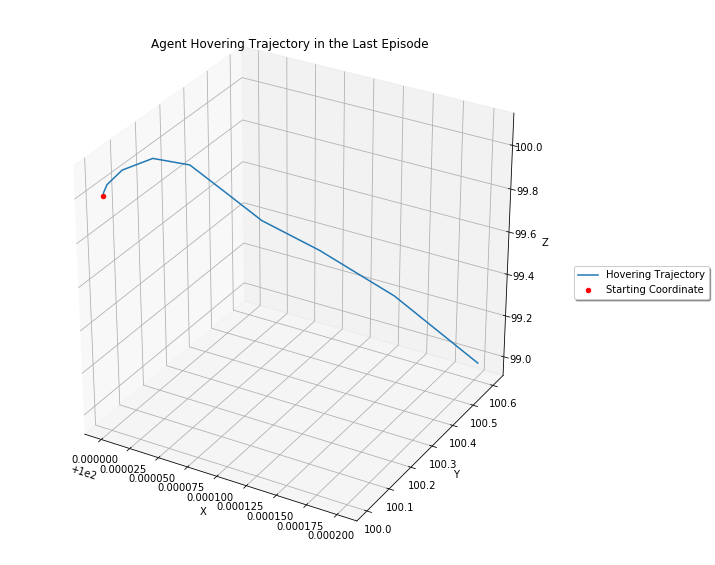

In [14]:
from mpl_toolkits.mplot3d import Axes3D

# visualization of the agent's performance in the last episode
x, y, z = zip(*recorded_coordinates[-1])
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.scatter(current_coordinates[0], current_coordinates[1], current_coordinates[2], 
          c='red', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Agent Hovering Trajectory in the Last Episode')
plt.legend(['Hovering Trajectory', 'Starting Coordinate'], 
                   loc='center left', 
                   bbox_to_anchor=(1, 0.5), 
                   fancybox=True, 
                   shadow=True)

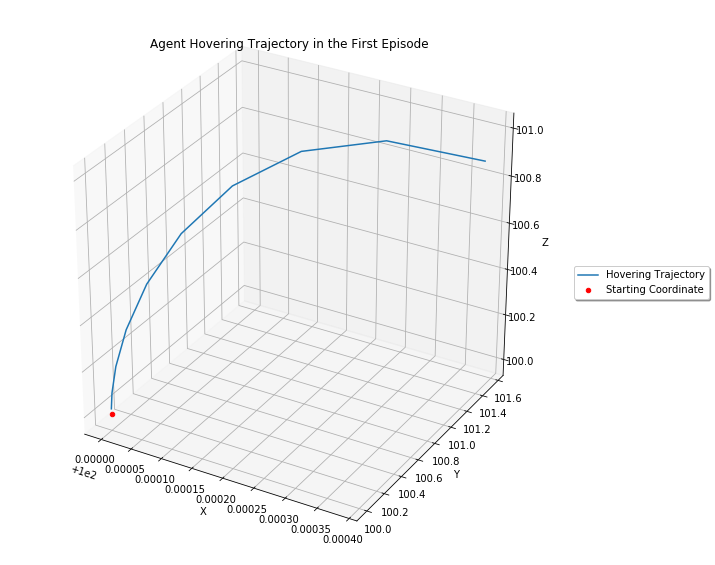

In [15]:
# visualization of the agent's performance in the first episode
x, y, z = zip(*recorded_coordinates[0])
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.scatter(current_coordinates[0], current_coordinates[1], current_coordinates[2], 
          c='red', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Agent Hovering Trajectory in the First Episode')
plt.legend(['Hovering Trajectory', 'Starting Coordinate'], 
                   loc='center left', 
                   bbox_to_anchor=(1, 0.5), 
                   fancybox=True, 
                   shadow=True)

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

The task that I specified is hovering. In other words, the agent is supposed to hold her positions (x, y, and z coordinates) as steady as possible within a certain period of time.


The approach that I took is to leverage the agent's starting and ending positions, in a way that any positions' differences captured will get penalized with a negative reward.


There're three points to tackle when designing the reward function to guide the agent:

    1. Capturing positions' differences in a 3-dimensional space
    2. Narrowing rewards variance
    3. Correlating positions' differences with negative rewards

The reward function first calculates the [Euclidean distance](https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy) of any given positions in a 3-dimensioanl space. The distance value is then fed into a Sigmoid function, in which it is squashed between 0 and 1. As the [length of the vector (norm)](https://machinelearningmastery.com/vector-norms-machine-learning/) is always a positive number (Except for a vector of all zero values), the Sigmoid function therefore only outputs values between 0.5 and 1. 


In order to create a negative reward mechanism associated with positions' differences, the Sigmoid output is subtracted from 0.5; so any positions' differences (Vector norm) will get translated into negative values (Negative reward), and a vector of all zero values will just yield 0 (reward).

The reward function is as below:

    reward = 0.5 - (sigmoid(np.linalg.norm(self.sim.pose[:3] - self.target_pos[:3])))

The design should discourage the agent from moving around. On top of that, we could multiply the reward by a scaling factor based on the runtime (Hovering duration); so the total rewards could be maintained within a certain range.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

I thought about using a Deep-Q-Network (DQN), but I later figured it'd not be ideal for the quadcopter problem because it's a control problem with a continuous action space; so I ended up with the implementation suggested in the ["Continuous Control with Deep Reinforcement Learning" paper](https://arxiv.org/pdf/1509.02971.pdf), which is an actor-critic, model-free algorithm based on the deterministic policy gradient (DPG) that can operate over continuous action spaces.

The Neural Network architectures of Actor and Critic are as below:

        """ An Actor (policy) network that maps states -> actions """
        # Define input layer (states)
        states = layers.Input(shape=(self.state_size,), name='states')
        
        # Add hidden layers
        net = layers.Dense(units=32, activation='relu')(states)
        net = layers.Dense(units=64, activation='relu')(net)
        net = layers.Dense(units=32, activation='relu')(net)

        # Add final output layer with sigmoid activation
        raw_actions = layers.Dense(units=self.action_size, activation='sigmoid',
            name='raw_actions')(net)

        # Scale [0, 1] output for each action dimension to proper range
        actions = layers.Lambda(lambda x: (x * self.action_range) + self.action_low,
            name='actions')(raw_actions)

        """ A Critic network that maps (state, action) pairs -> Q-values """
        # Define input layers
        states = layers.Input(shape=(self.state_size,), name='states')
        actions = layers.Input(shape=(self.action_size,), name='actions')

        # Add hidden layer(s) for state pathway
        net_states = layers.Dense(units=32, activation='relu')(states)
        net_states = layers.Dense(units=64, activation='relu')(net_states)

        # Add hidden layer(s) for action pathway
        net_actions = layers.Dense(units=32, activation='relu')(actions)
        net_actions = layers.Dense(units=64, activation='relu')(net_actions)

        # Combine state and action pathways
        net = layers.Add()([net_states, net_actions])
        net = layers.Activation('relu')(net)

        # Add final output layer to prduce action values (Q values)
        Q_values = layers.Dense(units=1, name='q_values')(net)

Techniques like Batch Normalization, Dropout, and variations in model hyperparameters like the number of hidden nodes and layers did not make much of a difference in the sense of optimizing the agent's hovering performance, and this seems to be quite common among [students](https://discussions.udacity.com/t/stuck-on-hover-task-training-no-progress-and-crazy-big-numbers-on-angular-v-and-angular-accels-in-physics-sim/652648/8) who try to have the agent hover steadily; the default architectures were therefore adopted.

Optimizer hyperparameters, on the other hand, seem to have greater impact on the agent's performance. One of the more profound ones is the learning rate ($\alpha$) specified in the Adam optimizer. Although its [default value](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) (1e-3) resulted in faster initial learning, the model was highly unstable, and the agent's performance gradually declined. Students on [Udacity Forum](https://discussions.udacity.com/t/stuck-on-hover-task-training-no-progress-and-crazy-big-numbers-on-angular-v-and-angular-accels-in-physics-sim/652648/9) also suggest tuning the learning rate could potentially help enhance the agent's performance. The learning eventually had an obvious improvement when the learning rate was tuned down to 1e-7.

How to set the parameters of noise process is a non-trivial question. As suggested by [forum mentor](https://discussions.udacity.com/t/teaching-the-quadcopter-to-takeoff-hover-etc/685370/2) and [students](https://discussions.udacity.com/t/stuck-on-hover-task-training-no-progress-and-crazy-big-numbers-on-angular-v-and-angular-accels-in-physics-sim/652648/2), noise samples help the agent stay exploratory; so she could be exposed to better opportunities. Nonetheless, too much noise would fail the agent and the model get ridiculously unstable, which I validated by boosting the noise parameters. I ended up with the parameters as below:

$\mu$ = 0.5, $\theta$ = 0.5, $\sigma$ = 0.5

In addition, for exploratory purposes, I tried not to discount future much by having a large discount factor (default) for the algorithm:

$\gamma$ = 0.99, $\tau$ = 0.01

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

The model did gradually learn to hover. Here's the plot of `Total Rewards vs Number of Episodes`.:

![good_seed](plot_rewards/good_seed.png)

From the plot above, we can tell the agent was constantly learning for the first 300 episodes or so, and started to go plateau afterwards.

Here's the agent's coordinates in the last episode (350th):

    [[100.00000003398914, 100.00057830346063, 100.01028588886838],
     [100.00000067299587, 100.01226242636861, 100.03864715452248],
     [100.00000319536613, 100.06104026541172, 100.06689396206706],
     [100.00000894197254, 100.15604339402979, 100.04957571646659],
     [100.00001921090171, 100.25611616077586, 99.952835940863338],
     [100.00003533180127, 100.31574958054249, 99.808747333912692],
     [100.00005894938465, 100.36134642271101, 99.667110859504604],
     [100.00009264795821, 100.44495914469583, 99.504894275504626],
     [100.00013894809334, 100.54380038512937, 99.270552483643257],
     [100.00020059863483, 100.60596591763262, 98.98516053126761]]

Each row represents the agent's coordinate at a single timestep, and each column represents a single position, namely x, y, and z (Starting from the left). The agent's starting coordinate was (100, 100, 100), looking at the 2d-array above, most of the positions vary by less than 1; so the agent's performance is generally acceptable.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

In a nutshell, this is by far the most difficult project (Across all Nanodegrees and modules) I've done on Udacity. Although certain starter code is provided, the project is difficult in a way that we have to articulate the actual problem to multiple concepts in Machine Learning (Neural Network, Reinforcement Learning etc.), not to mention these concepts alone are already highly complex and sophisticated.


Having said that, I now have a taster of how solving real world problems with these tools is like, and I can tell how it's never meant to be easy.

There're three items in this project that I found highly challenging:

    1. Designing reward function
    2. Tuning hyperparameters
    3. Setting random seeds

And what surprised me the most is actually the third item. To illustrate the idea, here're two plots on `Total Rewards vs Number of Episodes` with the random seeds swapped:

    np.random.seed(215)
    tf.set_random_seed(1128)

![good_seed](plot_rewards/good_seed.png)

    np.random.seed(1128)
    tf.set_random_seed(215)

![bad_seed](plot_rewards/bad_seed.png)

To clarify, the only difference of the two models is the random seeds. All other factors are held equal, including network architectures and all sorts of parameters.


Such a big difference blew my mind when I saw it the first time. Reinforcement Learning seems highly sensitive to random seed selection, and it's not uncommon in the field.

References:


- [Deep Reinforcement Learning that Matters](https://arxiv.org/pdf/1709.06560.pdf)
- [Deep Reinforcement Learning Doesn't Work Yet](https://www.alexirpan.com/2018/02/14/rl-hard.html)